In [1]:
import pandas
import numpy 
import seaborn
import matplotlib.pyplot as plot 

hM = pandas.read_csv(r'C:\Users\OhHen\Dropbox\PC\Desktop\Final Project\hospital_mortality.csv')

In [2]:
hM.columns = hM.columns.str.replace(' ', '_')
hM 

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD_with_no_MI,diabetes,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [4]:
targetFactors = [features for features in hM.columns if len(hM[features].unique())>5]

secondaryFactors = [features for features in hM.columns if features not in targetFactors]

for i in targetFactors:
    if hM[i].isnull().sum()>1:
        hM[i] = hM[i].fillna(hM[i].mean())

hM.isnull().sum()

group                       0
ID                          0
outcome                     1
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD_with_no_MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal_failure               0
COPD                        0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
temperature                 0
SP_O2                       0
Urine_output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

In [5]:
#Drop the columns ID and Group which are not factors that determine mortality 

hM = hM.drop(columns=['ID', 'group'], axis=1)

#Drop any rows with null values to clean the data 
hM = hM.dropna(how='any', axis=0)

In [6]:
#The column.outcome displays whether the patient lived during 
#their hospital stay or passed away where value of 1 = death and 0 = alive 
hM.outcome

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1172    0.0
1173    0.0
1174    0.0
1175    0.0
1176    0.0
Name: outcome, Length: 1175, dtype: float64

In [7]:
#Count the number of patients that survived(column.outcome=0) and died(column.outcome=1)
hM.outcome.value_counts()

0.0    1016
1.0     159
Name: outcome, dtype: int64

In [8]:
#Machine Learning, split data into training set X and testing set y 

X = hM.drop('outcome', axis=1)
#y contains the variable mortality outcome that we are trying to predict 
y = hM['outcome']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=None)

In [9]:
#Feature scaling to normalize the dataset
#Import StandardScaler class frm the Sklearn library's preprocessing module 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

X_train

array([[-0.51212004, -1.03906016,  1.70373958, ..., -1.28333774,
         1.95910213,  0.48834958],
       [ 1.38542601,  0.96240818, -0.18836606, ..., -0.15140632,
         0.6669657 ,  0.48834958],
       [ 0.21770536,  0.96240818,  1.4023306 , ..., -0.38983977,
         0.35049531,  0.48834958],
       ...,
       [ 0.36367045, -1.03906016, -0.00708774, ..., -0.00958296,
         2.60111214,  2.05000498],
       [-1.24194544, -1.03906016, -0.36477791, ..., -1.04038661,
        -1.97116211, -1.07330582],
       [ 0.94753077,  0.96240818, -0.26089357, ..., -0.62074374,
        -1.31344442,  0.48834958]])

In [18]:
! pip install xgboost 
from xgboost import XGBClassifier
from sklearn import metrics 

final_Model = XGBClassifier()
final_Model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [19]:
print('Final Model Train Score is:', final_Model.score(X_train, y_train))
print('Final Model Test Score is:', final_Model.score(X_test, y_test))

Final Model Train Score is: 1.0
Final Model Test Score is: 0.8382978723404255


In [21]:
#Prediction Model 
finalPrediction = final_Model.predict(X_test)
finalPrediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [36]:
from sklearn.metrics import confusion_matrix

cMatrix=confusion_matrix(y_test,finalPrediction)
cMatrix



array([[193,   4],
       [ 34,   4]], dtype=int64)

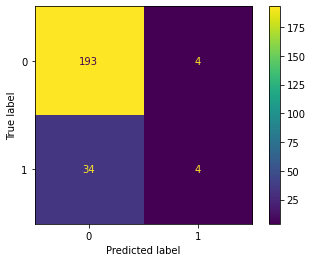

In [34]:
from sklearn.metrics import plot_confusion_matrix
#Confusion Matrix Visual 
from sklearn.metrics import confusion_matrix
cMatrix2 = confusion_matrix(y_test, finalPrediction)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cMatrix2)
disp.plot()
plot.show()

In [35]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, finalPrediction)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, finalPrediction)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, finalPrediction)

print("The mean_absolute_error",meanabs)
print("The mean_Squre_error",meansq)
print("The Medain_absolute_error",medianab)

The mean_absolute_error 0.16170212765957448
The mean_Squre_error 0.16170212765957448
The Medain_absolute_error 0.0


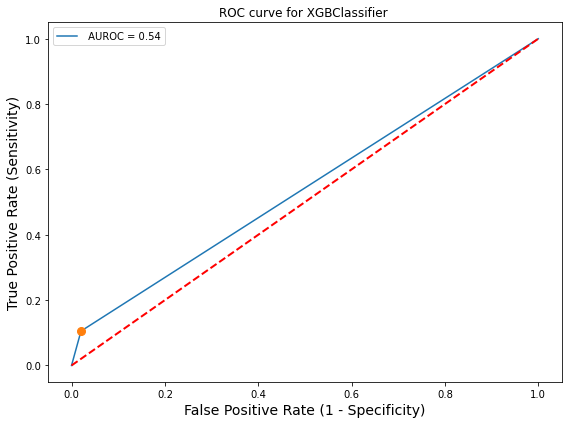

In [48]:
#ROC Curve for model 
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plot.subplots(figsize = (8,6))

#roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,finalPrediction)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plot.title('ROC curve for XGBClassifier ')
plot.xlabel('False Positive Rate (1 - Specificity)')
plot.ylabel('True Positive Rate (Sensitivity)')

#find default threshold
close_default = numpy.argmin(numpy.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plot.tight_layout()